In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mne
import ast
from tqdm import tqdm
from scipy.stats import skew, kurtosis

In [36]:
processed_path = '../Data/Processed/sub01_binned_raw.csv'
eeg_data = pd.read_csv(processed_path)

eeg_task_path = '../Data/Processed/sub01_binned_task_raw.csv'
eeg_task = pd.read_csv(eeg_task_path)

In [37]:
def extract_features_for_electrode(eeg_data, electrode):
    if electrode not in eeg_data.columns:
        raise ValueError(f"Electrode '{electrode}' not found in the DataFrame.")
    
    features = []

    # Iterate over each trial (row in the DataFrame)
    for trial in range(eeg_data.shape[0]):
        # Convert the string representation to a list of floats
        channel_data = ast.literal_eval(eeg_data[electrode].iloc[trial])

        # Extract statistical features
        mean_val = np.mean(channel_data)
        std_val = np.std(channel_data)
        rms_val = np.sqrt(np.mean(np.square(channel_data)))
        skewness = skew(channel_data)
        kurt = kurtosis(channel_data)
        entropy = -np.sum(channel_data * np.log2(np.abs(channel_data) + 1e-10))
        
        # Store features for the current trial
        features.append([mean_val, std_val, rms_val, skewness, kurt, entropy])
    
    # Create a DataFrame with the extracted features
    columns = ['Mean', 'StdDev', 'RMS', 'Skewness', 'Kurtosis', 'Entropy']
    features_df = pd.DataFrame(features, columns=columns)
    
    # Add the label_type column to the features DataFrame
    features_df['Label_Type'] = eeg_data['label_type'].values
    
    return features_df

In [38]:
def plot_pairplot_for_electrode(eeg_data, electrode):
    # Extract features for the specified electrode
    features_df = extract_features_for_electrode(eeg_data, electrode)

    # Generate pairplot using Seaborn
    sns.pairplot(features_df, hue='Label_Type', diag_kind='kde')
    plt.suptitle(f'Pairplot for Electrode: {electrode}', y=1.02)
    plt.show()

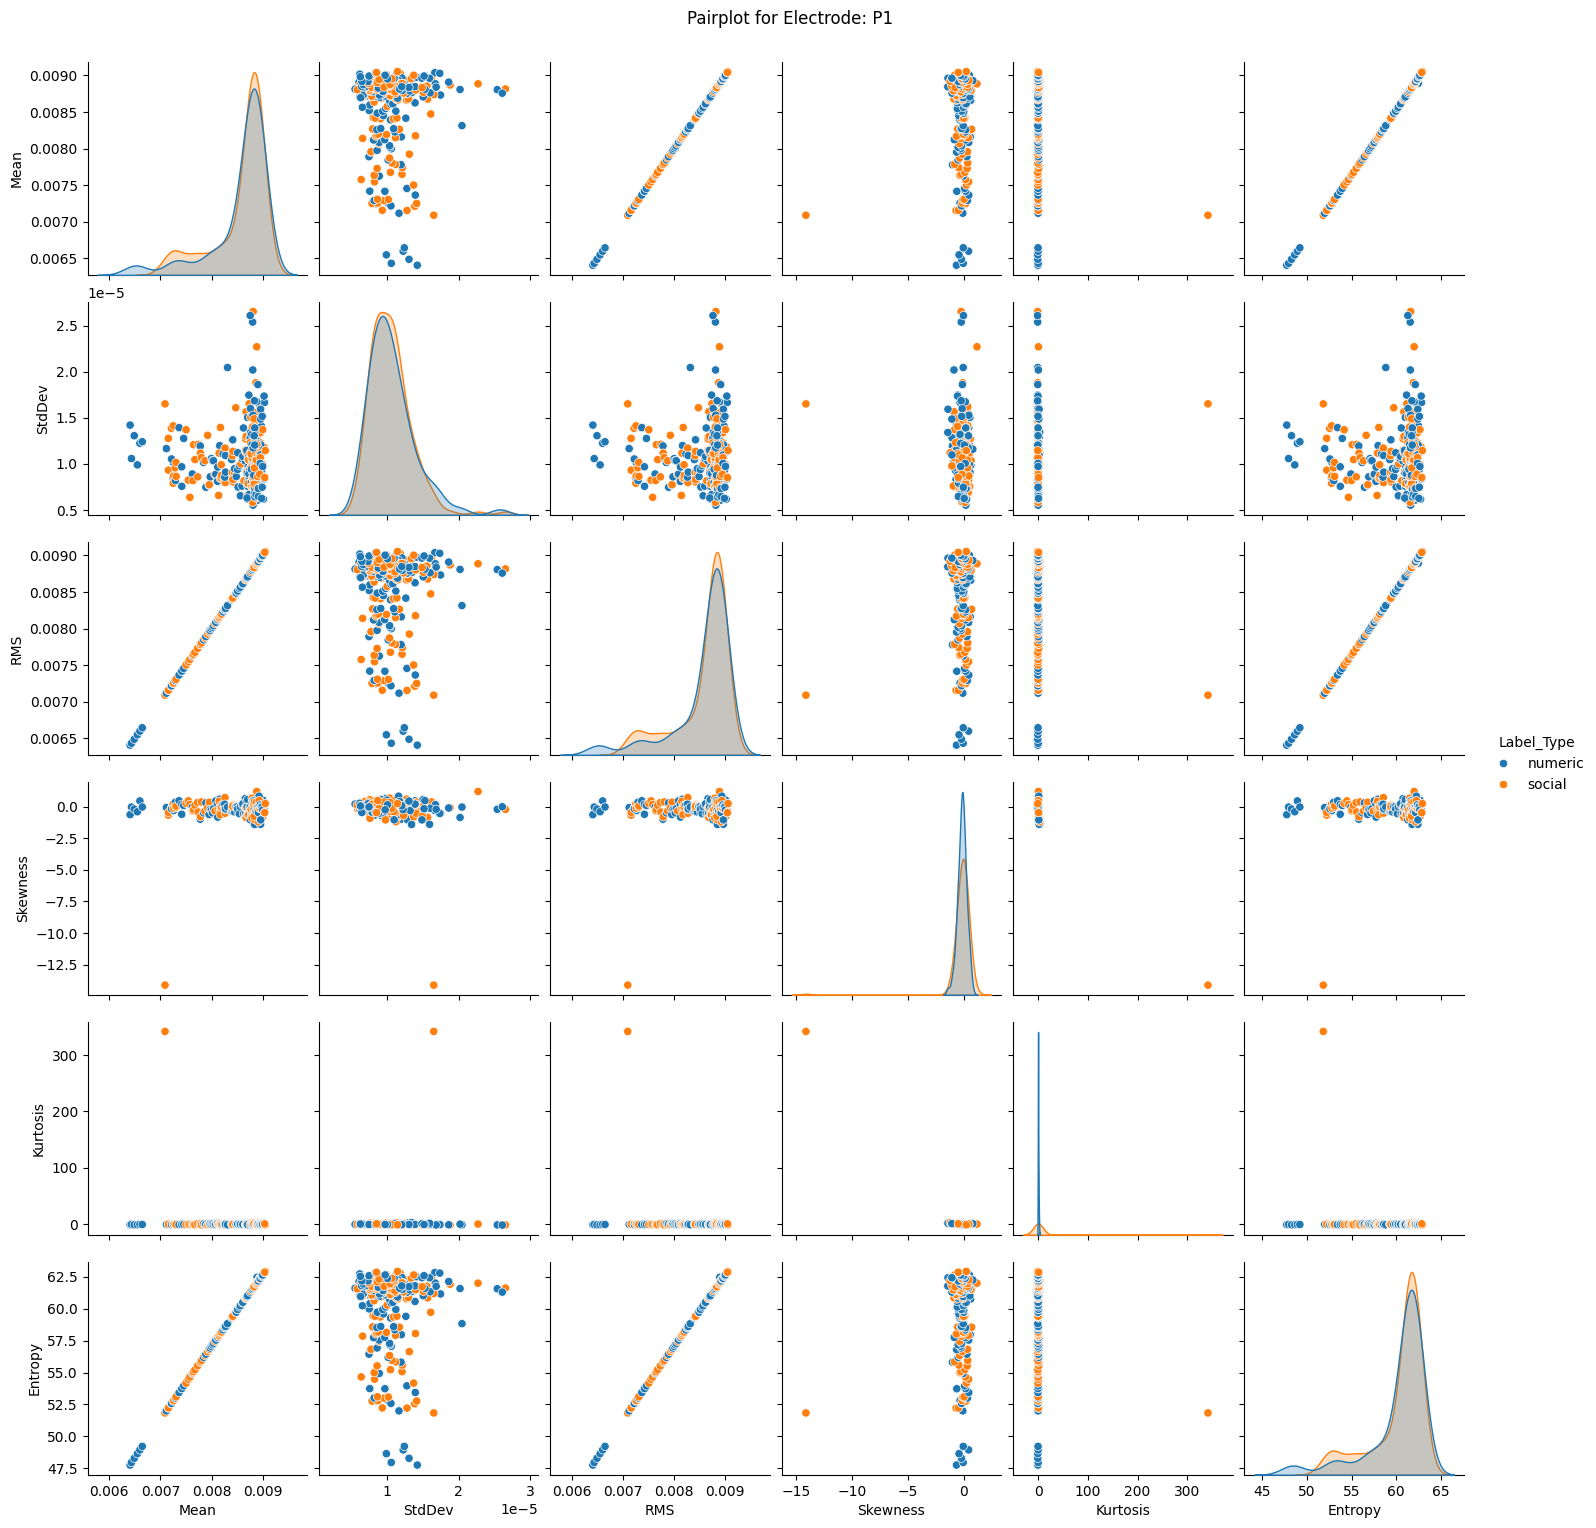

In [39]:
plot_pairplot_for_electrode(eeg_task, 'P1')